In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#Preprocessing Data
def file2sentences(filename): 
   txt = ""
   with open(filename,"r",encoding="utf-8") as f:
      txt = f.read()
 
   txt = txt.replace("?",".")
   txt = txt.replace("!",".")
   txt = txt.replace("»","")
   txt = txt.replace("«","")
   txt = txt.replace(":","")
   txt = txt.replace(";","")
   txt = txt.replace("...",".")
   txt = txt.replace("…",".")
   txt = txt.replace("\n",".")
   txt = txt.replace("  "," ")
   txt = txt.replace("\"","")
   txt = txt.replace("„","")
   sentences = txt.split(".")
   for i in range(len(sentences)):
      sentences[i] = sentences[i].strip()
      
   sentences = [x for x in sentences if x != ""]
   return sentences

In [3]:
italian = file2sentences("It.txt")
english = file2sentences("En.txt")
german = file2sentences("Ge.txt")
french = file2sentences("Fr.txt")
spanish = file2sentences("Es.txt")

X = np.array(italian + english + german + french + spanish)
y = np.array(['Italian']*len(italian) + ['English']*len(english) + ['German']*len(german) + ['French']*len(french) + ['Spanish']*len(spanish))

In [5]:
data = pd.DataFrame({'Sentences':X, 'Language':y})

In [6]:
data

,Sentences,Language
0,Sin dall'antichità le storie di spiriti e fant...,Italian
1,Molti racconti narrano di personaggi storici c...,Italian
2,Ad alimentare il mito è spesso la loro fine pr...,Italian
3,Il concetto di fantasma si basa sull'antica id...,Italian
4,"I fantasmi non esistono, lo sanno tutti",Italian
...,...,...
421,Este es el sistema perfecto para limpiar su ha...,Spanish
422,"Primero, mueva todos los elementos que no teng...",Spanish
423,Deshazte de al menos cinco cosas que no hayas ...,Spanish
424,Saque toda la basura y coloque todos los plato...,Spanish


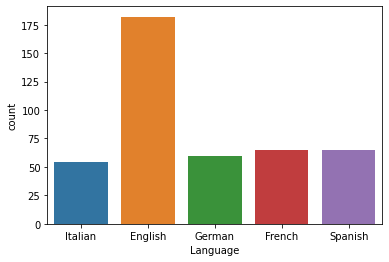

In [7]:
sb.countplot(data=data, x='Language')

In [23]:
def stats(data):
  for sentences in data.Sentences:
    word_list= ' '.join(sentences).split()
    noof_sentences = len(sentences)
    noof_words = len(word_list)
    noof_unique_words = len(word_list.unique())
    print(f'Language: {language}')
    print('-----------------------')
    print(f'Number of sentences\t:\t {noof_sentences}')
    print(f'Number of words\t\t:\t {noof_words}')
    print(f'Number of unique words\t:\t {noof_unique_words}')

In [8]:
data.value_counts('Language')

Language
English    182
Spanish     65
French      65
German      60
Italian     54
dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
cnt = CountVectorizer(analyzer = 'char',ngram_range=(2,2))

pipeline = Pipeline([
   ('vectorizer',cnt),  
   ('model',MultinomialNB())
])

In [11]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [12]:
predect = [input()]
print(pipeline.predict(predect))

Comment allez-vous
['French']
